<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.RwandaCO2Emissions/blob/main/1_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [6]:
from google.colab import drive


# Datasets
import pandas as pd


# Numerics
import numpy as np


# Plotting
import matplotlib.pyplot as plt


# Preprocessing & pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Setup

In [2]:
# %%capture

GIT_DOWNLOAD_PATH = 'https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/'

FILES_LIST = [
    'path_manager.py',
    'sklearn_transformers.py',
    'sklearn_utils.py',
    'model.py'
]



GDRIVE_PATH = '/content/gdrive/MyDrive/'
PREPROC_TRIAL = 1
MODELS_TRIAL = 1
COMPETITION_PATH = GDRIVE_PATH + 'ML/Competitions/8.CO2Emissions/'

# --------------------------------------------------

try:
    from nbpep8.nbpep8 import pep8
except ModuleNotFoundError:
    !pip install pycodestyle
    !pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8

# ---------------------------------------

def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}


url_dict = {file: GIT_DOWNLOAD_PATH + file for file in FILES_LIST}
print('a')
download_files(url_dict)

# ---------------------------------------

import importlib
import path_manager
import sklearn_utils
import sklearn_transformers
import model

def reload_all(modules_list_):
    for module in modules_list_:
        importlib.reload(module)

MODULES_LIST = [
    path_manager,
    sklearn_utils,
    sklearn_transformers,
    model
]
reload_all(MODULES_LIST)

# ---------------------------------------

from path_manager import PathManager
from model import Model

from sklearn_utils import nan_statistics
from sklearn_utils import boxplot_regression
from sklearn_utils import get_correlated_attributes
from sklearn_utils import visualize_datasets_distributions

from sklearn_transformers import ColumnDropper
from sklearn_transformers import LogTransformer

# ---------------------------------------

from google.colab import drive
drive.mount('/content/gdrive')

manager = PathManager(
    competition_path=COMPETITION_PATH,
    preprocessing_trial=PREPROC_TRIAL,
    models_trial=MODELS_TRIAL
)
manager.setup_paths()

Looking in indexes: https://test.pypi.org/simple/
a
--2023-09-23 09:14:38--  https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/path_manager.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3482 (3.4K) [text/plain]
Saving to: ‘path_manager.py’

path_manager.py     100%[===================>]   3.40K  --.-KB/s    in 0s      

2023-09-23 09:14:38 (33.2 MB/s) - ‘path_manager.py’ saved [3482/3482]

--2023-09-23 09:14:38--  http://path_manager.py/
Resolving path_manager.py (path_manager.py)... failed: Name or service not known.
wget: unable to resolve host address ‘path_manager.py’
FINISHED --2023-09-23 09:14:38--
Total wall clock time: 0.3s
Downloaded: 1 files, 3.4K in 0s (33.2 MB/s)
--2023-09-23 09:14:38--  https://raw.githubusercontent.com/PashaI

# Read the data

In [10]:
df = pd.read_csv(manager.train_path)

In [11]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# Data exploration

In [13]:
# We explore only the training part (or trainval part)
# Use the same seed, when splitting the data

TRAINVAL_SIZE = 0.8
RANDOM_SEED = 42

df_trainval, df_test = train_test_split(
    df,
    train_size = TRAINVAL_SIZE,
    random_state=RANDOM_SEED
)

df_trainval.shape, df_test.shape

((63218, 76), (15805, 76))

## Nan statistics

In [16]:
nan_statistics(df_trainval)

Col -- Nan percentage
UvAerosolLayerHeight_aerosol_height 99.44952386978392
UvAerosolLayerHeight_aerosol_pressure 99.44952386978392
UvAerosolLayerHeight_aerosol_optical_depth 99.44952386978392
UvAerosolLayerHeight_sensor_zenith_angle 99.44952386978392
UvAerosolLayerHeight_sensor_azimuth_angle 99.44952386978392
UvAerosolLayerHeight_solar_azimuth_angle 99.44952386978392
UvAerosolLayerHeight_solar_zenith_angle 99.44952386978392
NitrogenDioxide_NO2_column_number_density 23.23863456610459
NitrogenDioxide_tropospheric_NO2_column_number_density 23.23863456610459
NitrogenDioxide_stratospheric_NO2_column_number_density 23.23863456610459
NitrogenDioxide_NO2_slant_column_number_density 23.23863456610459
NitrogenDioxide_tropopause_pressure 23.23863456610459
NitrogenDioxide_absorbing_aerosol_index 23.23863456610459
NitrogenDioxide_cloud_fraction 23.23863456610459
NitrogenDioxide_sensor_altitude 23.23863456610459
NitrogenDioxide_sensor_azimuth_angle 23.23863456610459
NitrogenDioxide_sensor_zenith_an

{'SulphurDioxide_SO2_column_number_density': 18.46309595368408,
 'SulphurDioxide_SO2_column_number_density_amf': 18.46309595368408,
 'SulphurDioxide_SO2_slant_column_number_density': 18.46309595368408,
 'SulphurDioxide_cloud_fraction': 18.46309595368408,
 'SulphurDioxide_sensor_azimuth_angle': 18.46309595368408,
 'SulphurDioxide_sensor_zenith_angle': 18.46309595368408,
 'SulphurDioxide_solar_azimuth_angle': 18.46309595368408,
 'SulphurDioxide_solar_zenith_angle': 18.46309595368408,
 'SulphurDioxide_SO2_column_number_density_15km': 18.46309595368408,
 'CarbonMonoxide_CO_column_number_density': 2.719162263912177,
 'CarbonMonoxide_H2O_column_number_density': 2.719162263912177,
 'CarbonMonoxide_cloud_height': 2.719162263912177,
 'CarbonMonoxide_sensor_altitude': 2.719162263912177,
 'CarbonMonoxide_sensor_azimuth_angle': 2.719162263912177,
 'CarbonMonoxide_sensor_zenith_angle': 2.719162263912177,
 'CarbonMonoxide_solar_azimuth_angle': 2.719162263912177,
 'CarbonMonoxide_solar_zenith_angle':

In [30]:
def nan_report(df, threshold):
    nan_percent_df = df.isna().sum() / df.shape[0]
    subset = nan_percent_df[nan_percent_df > threshold]
    print(f'{subset.shape[0]} / {df.shape[1]} cols ({round(subset.shape[0]/df.shape[1], 2) * 100} %) have nan % > {threshold}\n')
    print(subset)
    return subset

_ = nan_report(df_trainval, 0.1)

28 / 76 cols (37.0 %) have nan % > 0.1

SulphurDioxide_SO2_column_number_density                   0.184631
SulphurDioxide_SO2_column_number_density_amf               0.184631
SulphurDioxide_SO2_slant_column_number_density             0.184631
SulphurDioxide_cloud_fraction                              0.184631
SulphurDioxide_sensor_azimuth_angle                        0.184631
SulphurDioxide_sensor_zenith_angle                         0.184631
SulphurDioxide_solar_azimuth_angle                         0.184631
SulphurDioxide_solar_zenith_angle                          0.184631
SulphurDioxide_SO2_column_number_density_15km              0.184631
NitrogenDioxide_NO2_column_number_density                  0.232386
NitrogenDioxide_tropospheric_NO2_column_number_density     0.232386
NitrogenDioxide_stratospheric_NO2_column_number_density    0.232386
NitrogenDioxide_NO2_slant_column_number_density            0.232386
NitrogenDioxide_tropopause_pressure                        0.232386
Nitrogen

<Axes: >

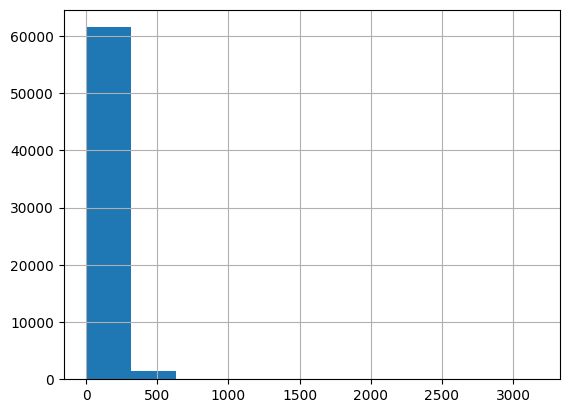

In [15]:
df_trainval['emission'].hist()

## Outlier analysis

### Outliers in target

<Axes: >

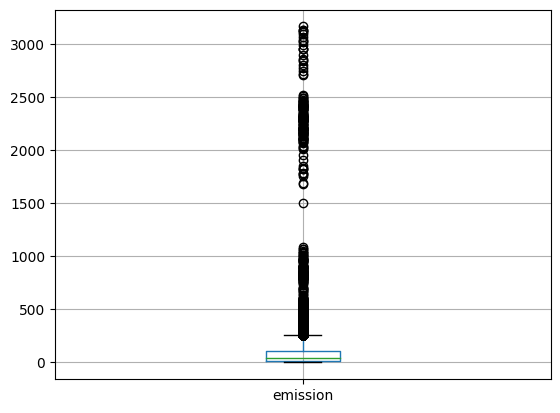

In [35]:
df_trainval[['emission']].boxplot()

In [38]:
df_trainval['emission'].describe()

count    63218.000000
mean        82.392697
std        148.033172
min          0.000000
25%          9.776888
50%         45.649794
75%        109.509563
max       3167.768000
Name: emission, dtype: float64

# Notes

- Remove columns with >18% outliers
- Clean outliers in target feature (or cap them to 600)
